In [2]:
#importing the libraries
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

# uploading the dataset
fifadata = pd.read_csv("C:/Users/mural/OneDrive/Documents/fifadataset.csv")

# to observe the dataset
fifadata.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# creating list of required columns to build the kmeans model 
# we have considered all the continuous variables 

a=[3,7,15,16,17]+list(range(54,88))


In [4]:
# to create the dataset having only continuous variables

newdata=fifadata.iloc[:,a].astype(float)
newdata.describe()

,Age,Overall,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
# To drop nulll values from dataset
newdata2=newdata.dropna()


In [6]:
# to find the optimum number of clusters, need to find out the elobow graph

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(newdata2) 
    kmeanModel.fit(newdata2)     
      
    distortions.append(sum(np.min(cdist(newdata2, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdata2.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdata2, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdata2.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 89.68474805254766
2 : 69.3832562821567
3 : 59.58961486948391
4 : 53.67326566231956
5 : 51.319125180814844
6 : 49.45206839658646
7 : 48.32545692455911
8 : 47.415838197253834
9 : 46.470046443924105


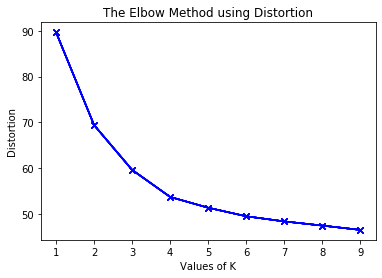

In [7]:
#Using the different values of Distortion

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

# from elbow method, n_clusters=4

1 : 177614771.42937386
2 : 95145836.71231116
3 : 69870793.14843944
4 : 55778651.76815346
5 : 50571616.077444196
6 : 47033298.55193385
7 : 44838115.06078533
8 : 42997625.13059743
9 : 41334509.80546774


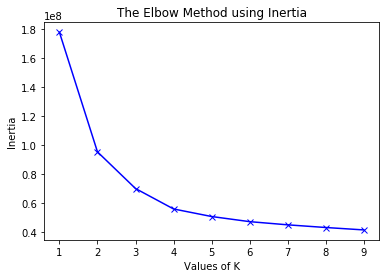

In [8]:
#Using the different values of Inertia


for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K')
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

#from elbow method, n_clusters=4

In [9]:
# build kmeans model using n_clusters=4

kmeanModel = KMeans(n_clusters=4).fit(newdata2)
kmeanModel.fit(newdata2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# to verify the labels of the kmeans

pd.DataFrame(data = kmeanModel.labels_)

,0
0,0
1,0
2,0
3,3
4,1
...,...
18154,2
18155,0
18156,0
18157,0


In [11]:
# to create another column in dataset to store cluster information

FinalDF = pd.concat([newdata2.reset_index(drop=True), pd.DataFrame(data = kmeanModel.labels_)], axis=1)

In [12]:
# to rename the column name of the cluster index in the dataset

FinalDF.rename(columns={0: 'Segment'}, inplace=True)

In [13]:
# to observe the dataset

FinalDF.head()

,Age,Overall,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Segment
0,31.0,94.0,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0
1,33.0,94.0,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0
2,26.0,92.0,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0
3,27.0,91.0,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,3
4,27.0,91.0,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1


In [17]:
## Calculating the Mean value across each parameter in the clusters

for i in FinalDF['Segment'].unique():
    sample = pd.DataFrame(pd.DataFrame(FinalDF[FinalDF['Segment']==i].describe()).loc['mean',:])
    sample.columns = ['Cluster '+str(i+1)]
    if i == 0:
        summary = sample
    else:
        summary = pd.merge(summary, sample, left_index=True, right_index=True)
    
summary.reset_index(drop = False,inplace = True)
summary

,index,Cluster 1,Cluster 2,Cluster 4,Cluster 3
0,Age,24.199555,26.045903,26.673446,24.200437
1,Overall,65.657881,64.599704,70.187987,63.482800
2,International Reputation,1.094301,1.095755,1.214218,1.036588
3,Weak Foot,3.120999,2.490128,3.084014,2.786638
4,Skill Moves,2.757488,1.000000,2.746626,2.046331
5,Crossing,54.136231,14.257651,63.653868,44.349970
6,Finishing,62.564094,12.020237,53.309637,31.175582
7,HeadingAccuracy,54.213075,14.369200,58.112146,59.271227
8,ShortPassing,61.200582,27.267029,69.856111,56.739113
9,Volleys,55.482458,12.399309,51.560540,31.541062


In [14]:
# Summary of Skills across the clusters

summary_skills = summary.iloc[5:39,:].reset_index(drop = True)
summary_skills

NameError: name 'summary' is not defined

In [15]:
## Top Skills across each cluster

for i in [1,2,3,4]:
    col = 'Cluster '+str(i)
    data = summary_skills[['index',col]].copy()
    
    data['Cluster'] = col
    data.columns = ['index','Score','Cluster']
    data.sort_values(by = ['Score'],ascending = False,inplace = True)
    if i ==1:
        top_skills = data
    else:
        top_skills = top_skills.append(data).reset_index(drop = True)    

top_skills.sort_values(by = ['Score'],ascending = False,inplace = True)
top_skills.drop_duplicates(['index'],keep = 'first',inplace = True)
top_skills['Cluster'].value_counts()

NameError: name 'summary_skills' is not defined

#### Cluster 3 - Based on Gaming Skills 

In [158]:
top_skills.loc[top_skills['Cluster']=='Cluster 3',:]


,index,Score,Cluster
68,Stamina,74.061658,Cluster 3
70,ShortPassing,69.840827,Cluster 3
72,BallControl,69.202239,Cluster 3
75,Aggression,67.992222,Cluster 3
76,Jumping,67.667805,Cluster 3
78,Reactions,67.321002,Cluster 3
79,Dribbling,66.699867,Cluster 3
80,ShotPower,66.570101,Cluster 3
81,Composure,66.264276,Cluster 3
82,LongPassing,66.018782,Cluster 3


#### Cluster 1 - Fitness 

In [115]:
top_skills.loc[top_skills['Cluster']=='Cluster 1',:]

,index,Score,Cluster
0,Acceleration,72.789906,Cluster 1
1,SprintSpeed,72.607870,Cluster 1
2,Agility,71.301454,Cluster 1
3,Balance,69.822754,Cluster 1
9,Positioning,62.925577,Cluster 1
10,Finishing,62.565612,Cluster 1
15,Penalties,59.444825,Cluster 1
18,Volleys,55.485201,Cluster 1


#### Cluster 2 - Goal Keeper Skills 

In [116]:
top_skills.loc[top_skills['Cluster']=='Cluster 2',:]

,index,Score,Cluster
34,GKReflexes,66.098717,Cluster 2
35,GKDiving,65.317868,Cluster 2
36,GKPositioning,63.044423,Cluster 2
37,GKHandling,62.860809,Cluster 2
38,GKKicking,61.477789,Cluster 2


#### Cluster 4 - Other Skills 

In [16]:
top_skills.loc[top_skills['Cluster']=='Cluster 4',:]

NameError: name 'top_skills' is not defined